## Zonal Statistics on Raster Data

##### Computing various statistics (such as Mean, Sum) of Pixcel Values over a specific Geometry

##### Clipping raster sections for each European country 

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt

<Axes: >

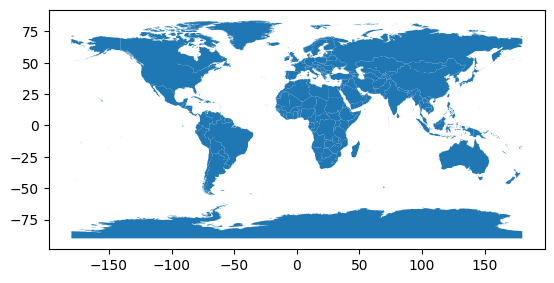

In [8]:
gdf = gpd.read_file("nw_data/ne_10m_admin_0_countries.shp")
gdf.plot()

<Axes: >

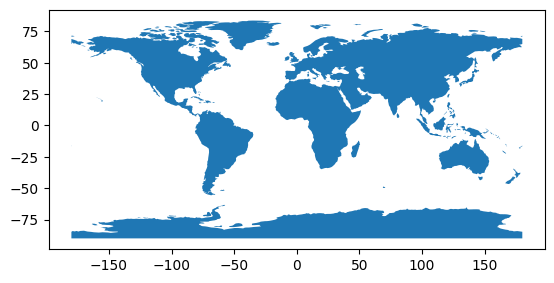

In [10]:
import geopandas as gpd
import geodatasets

# Get the path to the dataset
path = geodatasets.get_path("naturalearth.land")

# Read the file
gdf = gpd.read_file(path)

# Plot or use it
gdf.plot()

In [11]:
import rasterio
from rasterio.mask import mask

##### Preparing country boundaries

In [12]:
gdf = gpd.read_file("nw_data/ne_10m_admin_0_countries.shp")
gdf.head(2)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,0,2,Indonesia,IDN,0,2,Sovereign country,1,Indonesia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,0,3,Malaysia,MYS,0,2,Sovereign country,1,Malaysia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."


##### Filtering data to Europe

In [13]:
### checking if there's a coloum containing "cont" for continent: 

[k for k in list(gdf.keys()) if 'cont' in k.lower()]

['CONTINENT']

In [14]:
print(len(gdf))
gdf = gdf[gdf.CONTINENT=='Europe']
print(len(gdf))


258
51


<Axes: >

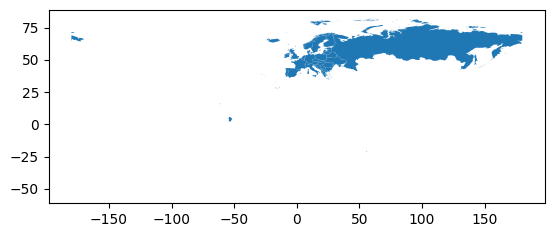

In [15]:
gdf.plot()

### Merging the BBOX with Europe Filter
##### BBOX was defined in "Clip_Raster_with_VectorData.ipynb" 

In [16]:
import geopandas as gpd

bbox = gpd.read_file('bbox.geojson')

<Axes: >

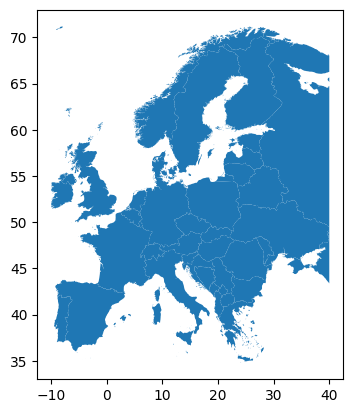

In [17]:
gdf = gpd.overlay(gdf, bbox)
gdf.plot()

#### Map the vector country boundaries on the population raster

In [19]:
### Europe-level raster file

real_world_tif = (r'c:\Users\saral\OneDrive\SL_Github\GIS_Python\Natural World tiff file\GHS_POP_E2020_GLOBE_R2023A_4326_30ss_V1_0(1)\GHS_POP_E2020_GLOBE_R2023A_4326_30ss_V1_0.tif')

output_file = 'clipped_raster.tif'

with rasterio.open(real_world_tif) as src:
    out_image = src.read(1)
    out_transform = src.transform

    polygon_sums = []                  ### create a list to store the sum of all corr pixels for each country

    for idx, polygon in gdf.iterrows():

        # masking
        geom = [polygon['geometry']]
        out_image_masked, out_transform_masked = mask(src, geom, crop = True)

        # data
        out_image_masked = out_image_masked[0]
        valid_data = out_image_masked[out_image_masked != src.nodata]

        #stats
        polygon_sum = valid_data.sum()
        polygon_sums.append(polygon_sum)


In [20]:
polygon_sums

[np.float64(63714232.860838905),
 np.float64(41444016.32399568),
 np.float64(9641283.043495046),
 np.float64(2815478.9102279334),
 np.float64(55829354.771163255),
 np.float64(10495961.359491996),
 np.float64(83311131.44401002),
 np.float64(1296990.738038411),
 np.float64(1876534.4651005673),
 np.float64(4498595.848784786),
 np.float64(9913674.478172643),
 np.float64(5316071.166660875),
 np.float64(627615.7414461903),
 np.float64(11586123.746585747),
 np.float64(2118102.9618667914),
 np.float64(2849775.4130707597),
 np.float64(1633469.4091530265),
 np.float64(44421469.31581843),
 np.float64(5559994.13669164),
 np.float64(19308700.059414323),
 np.float64(9758741.997545661),
 np.float64(5435947.231568756),
 np.float64(38489319.35751799),
 np.float64(4796091.8363614455),
 np.float64(66315182.70785178),
 np.float64(10018771.088533066),
 np.float64(8943922.40805413),
 np.float64(58681881.02801759),
 np.float64(8678634.065664073),
 np.float64(17286817.848599665),
 np.float64(39944.15780016394

In [21]:
gdf['total_population'] = polygon_sums

In [22]:
gdf [['SOVEREIGNT', 'geometry', 'total_population']].head(3)

,SOVEREIGNT,geometry,total_population
0,France,"MULTIPOLYGON (((2.53703 51.06461, 2.54706 51.0...",6.371423e+07
1,Ukraine,"MULTIPOLYGON (((31.82584 52.10406, 31.85871 52...",4.144402e+07
2,Belarus,"POLYGON ((23.60231 51.53078, 23.58867 51.5359,...",9.641283e+06


(np.float64(-12.5),
 np.float64(42.5),
 np.float64(32.996741033700076),
 np.float64(72.99863312430004))

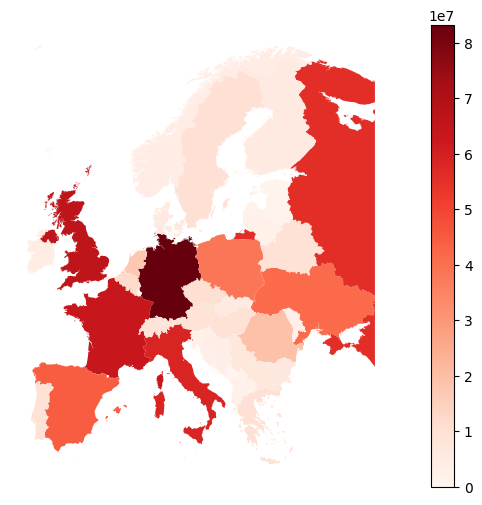

In [23]:
f, ax = plt.subplots(1,1,figsize=(10,6))
gdf.plot(ax=ax, column = 'total_population', cmap = 'Reds', legend = True)
ax.axis('off')